In [1]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
data = pd.read_csv('../Data/BPM_B1_formatted.txt',sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1534475788,-0.114,-0.035,-1.063,-0.024,-1.353,-1.518,-1.321,-1.025,0.254,-0.879,0.341,0.049,-1.138,-1.413,0.088,-1.494,-0.411,-0.820
1,1534475900,-0.062,-0.134,-0.786,-0.088,-1.211,-1.638,-1.044,-0.986,0.294,-0.837,0.301,0.101,-1.127,-1.339,0.204,-1.436,-0.358,-0.765
2,1534476235,-0.146,0.082,-1.066,0.090,-1.405,-1.392,-1.333,-0.891,0.286,-0.774,0.346,-0.035,-1.098,-1.444,0.073,-1.414,-0.433,-0.730
3,1534476421,-0.104,-0.037,-0.872,-0.020,-1.259,-1.500,-1.106,-0.912,0.269,-0.762,0.311,0.023,-1.143,-1.347,0.132,-1.396,-0.379,-0.668
4,1534476644,-0.014,-0.008,-0.859,0.053,-1.343,-1.365,-1.211,-0.913,0.224,-0.740,0.250,0.025,-0.971,-1.447,0.268,-1.489,-0.406,-0.696


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 19 columns):
0     1898 non-null int64
1     1898 non-null float64
2     1898 non-null float64
3     1898 non-null float64
4     1898 non-null float64
5     1898 non-null float64
6     1898 non-null float64
7     1898 non-null float64
8     1898 non-null float64
9     1898 non-null float64
10    1898 non-null float64
11    1898 non-null float64
12    1898 non-null float64
13    1898 non-null float64
14    1898 non-null float64
15    1898 non-null float64
16    1898 non-null float64
17    1898 non-null float64
18    1898 non-null float64
dtypes: float64(18), int64(1)
memory usage: 281.8 KB


Convert the -999's to Nan's and remove them

In [4]:
data = data.replace(-999,np.nan)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1896
Data columns (total 19 columns):
0     1463 non-null float64
1     1463 non-null float64
2     1463 non-null float64
3     1463 non-null float64
4     1463 non-null float64
5     1463 non-null float64
6     1463 non-null float64
7     1463 non-null float64
8     1463 non-null float64
9     1463 non-null float64
10    1463 non-null float64
11    1463 non-null float64
12    1463 non-null float64
13    1463 non-null float64
14    1463 non-null float64
15    1463 non-null float64
16    1463 non-null float64
17    1463 non-null float64
18    1463 non-null float64
dtypes: float64(19)
memory usage: 228.6 KB


In [5]:
data.iloc[0][1].mean()
#len(data.columns)


-0.114

In [6]:
def get_mse(row):
    regression_line = data.iloc[0]
    mse = []
    for i in range(1,len(row)):
        mse.append((regression_line[i]-row[i])**2)
    return np.mean(mse)

In [7]:
get_mse(data.iloc[1])

0.01344794444444445

Apply Function on each row:

In [8]:
data['MSE'] = data.apply(lambda row: get_mse(row), axis=1)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,MSE
0,1.534476e+09,-0.114,-0.035,-1.063,-0.024,-1.353,-1.518,-1.321,-1.025,0.254,-0.879,0.341,0.049,-1.138,-1.413,0.088,-1.494,-0.411,-0.820,0.000000
1,1.534476e+09,-0.062,-0.134,-0.786,-0.088,-1.211,-1.638,-1.044,-0.986,0.294,-0.837,0.301,0.101,-1.127,-1.339,0.204,-1.436,-0.358,-0.765,0.013448
2,1.534476e+09,-0.146,0.082,-1.066,0.090,-1.405,-1.392,-1.333,-0.891,0.286,-0.774,0.346,-0.035,-1.098,-1.444,0.073,-1.414,-0.433,-0.730,0.005628
3,1.534476e+09,-0.104,-0.037,-0.872,-0.020,-1.259,-1.500,-1.106,-0.912,0.269,-0.762,0.311,0.023,-1.143,-1.347,0.132,-1.396,-0.379,-0.668,0.008905
4,1.534477e+09,-0.014,-0.008,-0.859,0.053,-1.343,-1.365,-1.211,-0.913,0.224,-0.740,0.250,0.025,-0.971,-1.447,0.268,-1.489,-0.406,-0.696,0.011799


In [10]:
data = data.rename(columns={0:'Time Stamp'})

In [15]:
condition = data['MSE'] > 0.7
condition2 = data['MSE'] <= 0.7
new_data = data[condition]
new_data.head()

data = data[condition2]

Text(0.5,1,'MSE of Beam Positions in the TL')

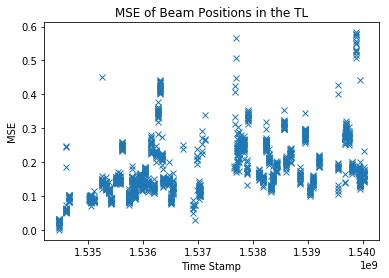

In [17]:
fig = plt.figure()
plt.plot(data['Time Stamp'],data['MSE'],'x')
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Beam Positions in the TL')

In [16]:
data.to_pickle('../Data/Beam1_TL_BPM.pkl')

## Same thing for TI8:

In [9]:
dataB2 = pd.read_csv('../Data/BPM_B2_formatted.txt',sep='\t', header=None)
dataB2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1534475826,-0.309,1.716,0.349,0.999,-0.028,0.528,0.183,-0.415,-1.164,0.774,-0.029,0.771,-0.570,0.313,-0.164,-0.422,-0.164,-0.422
1,1534475937,-0.316,1.542,0.421,0.851,0.041,0.431,0.261,-0.398,-1.202,0.704,0.002,0.646,-0.406,0.253,-0.138,-0.468,-0.138,-0.468
2,1534476309,-0.341,1.545,0.342,1.016,0.021,0.740,0.340,-0.310,-1.212,0.611,-0.063,0.690,-0.497,0.403,-0.142,-0.378,-0.142,-0.378
3,1534476458,-0.285,1.523,0.425,1.048,0.065,0.750,0.362,-0.293,-1.215,0.594,-0.008,0.663,-0.256,0.352,-0.056,-0.375,-0.056,-0.375
4,1534476532,-0.300,1.311,0.287,1.056,-0.050,0.930,0.210,-0.234,-1.164,0.419,0.021,0.517,-0.390,0.393,-0.139,-0.273,-0.139,-0.273


In [10]:
dataB2 = dataB2.replace(-999,np.nan)
dataB2 = dataB2.dropna()
dataB2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1739
Data columns (total 19 columns):
0     1517 non-null float64
1     1517 non-null float64
2     1517 non-null float64
3     1517 non-null float64
4     1517 non-null float64
5     1517 non-null float64
6     1517 non-null float64
7     1517 non-null float64
8     1517 non-null float64
9     1517 non-null float64
10    1517 non-null float64
11    1517 non-null float64
12    1517 non-null float64
13    1517 non-null float64
14    1517 non-null float64
15    1517 non-null float64
16    1517 non-null float64
17    1517 non-null float64
18    1517 non-null float64
dtypes: float64(19)
memory usage: 237.0 KB


In [11]:
def get_mseB2(row):
    regression_line = dataB2.iloc[0]
    mse = []
    for i in range(1,len(row)):
        mse.append((regression_line[i]-row[i])**2)
    return np.mean(mse)

In [12]:
dataB2['MSE'] = dataB2.apply(lambda row: get_mseB2(row), axis=1)

In [13]:
dataB2 = dataB2.rename(columns={0:'Time Stamp'})

Text(0.5,1,'MSE of Beam Positions in the TL')

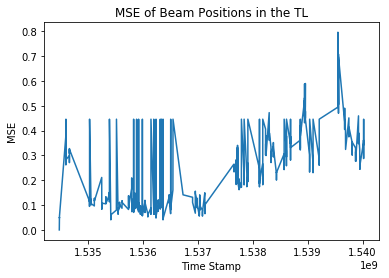

In [14]:
fig = plt.figure()
plt.plot(dataB2['Time Stamp'],dataB2['MSE'])
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Beam Positions in the TL')

In [17]:
dataB2.to_pickle('../Data/Beam2_TL_BPM.pkl')